In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob
from os import listdir
from os.path import isfile, join

This will get all the files in a folder in onlyfiles. And then it will read them all and store them in the array images.

In [2]:
mypath='/content/drive/Shareddrives/workspace/THESIS/sample_data'

onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

images = np.empty(len(onlyfiles), dtype=object)

for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )

This function will plot original image and segmented image

In [3]:
def segmented_image(image):
    original = image.copy()
    #Erosion
    image = np.array(image, dtype=np.uint8)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
    image[thresh == 255] = 0
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    erosion = cv2.erode(image, kernel, iterations = 1)
    
    # convert to grayscale, Gaussian blur, Otsu's threshold
    gray = cv2.cvtColor(erosion, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    
     # Obtain bounding rectangle and extract ROI
    x,y,w,h = cv2.boundingRect(thresh)
    ROI = original[y:y+h, x:x+w]
    #io.imsave("ROI.jpg",ROI)

    plt.figure(figsize=(15, 10))
    plt.subplot(121); plt.imshow(original)
    plt.title("Original Image")
    plt.subplot(122); plt.imshow(ROI)
    plt.title("Segmented image(original)")

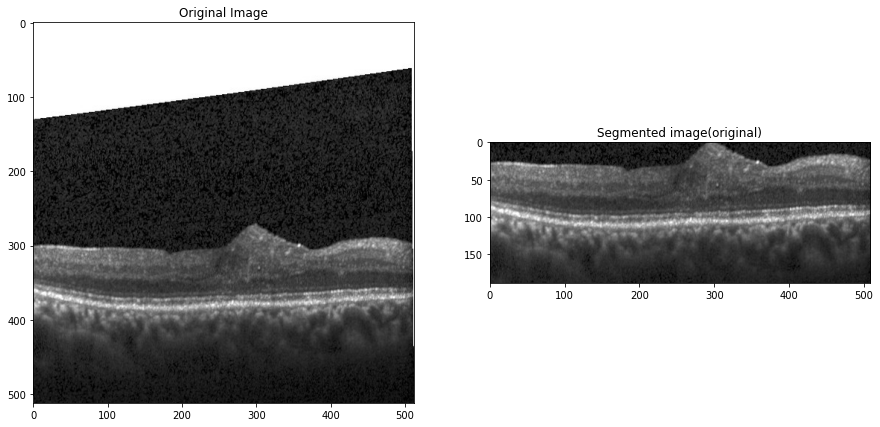

In [4]:
segmented_image(images[4])